# 資管四 唐瑋廷 B05705043 HW3

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

## Q1

read dataset

In [2]:
stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head(10)

There are 60461 students and 1976 departments in total.
offers received by students:


,school_id,department_id,student_id,student_name,state,location1,location2
0,001,001012,10246842,黃士玹,正1,南部,台南考區
1,001,001012,10042237,黃冠婷,正2,北部,台北考區
2,001,001012,10008031,鍾大方,正3,北部,台北考區
3,001,001012,10201525,曾信豪,正4,中部,彰化考區
4,001,001012,10014615,陳品儒,正5,北部,台北考區
5,001,001012,10294018,侯思筠,正6,東部,宜蘭考區
6,001,001012,10022810,吳悅慈,正7,北部,台北考區
7,001,001012,10236223,陳俞潔,正8,南部,台南考區
8,001,001012,10025909,蕭宇廷,正9,北部,台北考區
9,001,001012,10123708,吳岱軒,正10,北部,中壢考區


In [3]:
print("academic department basic information:")
uname.head(10)

academic department basic information:


,year,school_id,department_id,school_name,department_name,category_id,category_name,school_name_abbr,department_name_abbr
0,106,006,006042,國立政治大學,教育學系,1,教育,政大,教育
1,106,006,006052,國立政治大學,教育學系(公費生),1,教育,政大,教育(公)
2,106,006,006062,國立政治大學,教育學系(原住民公費生),1,教育,政大,教育(原住民)
3,106,006,006022,國立政治大學,歷史學系,2,藝術及人文,政大,歷史
4,106,006,006152,國立政治大學,民族學系,2,藝術及人文,政大,民族學
5,106,006,006032,國立政治大學,哲學系,2,藝術及人文,政大,哲學
6,106,006,006262,國立政治大學,英國語文學系,2,藝術及人文,政大,英國語文
7,106,006,006292,國立政治大學,日本語文學系,2,藝術及人文,政大,日本語文
8,106,006,006272,國立政治大學,阿拉伯語文學系,2,藝術及人文,政大,阿拉伯語文
9,106,006,006302,國立政治大學,韓國語文學系,2,藝術及人文,政大,韓國語文


convert into a matrix

In [4]:
matrix = pd.crosstab(stu_adm.department_id, stu_adm.student_id)
matrix

student_id,10000101,10000106,10000110,10000111,10000112,10000114,10000116,10000120,10000121,10000123,...,NTU0604948,NTU0604951,NTU0604964,NTU0604970,NTU0604975,NTU0604991,NTU0604992,NTU0604995,NTU0605007,NTU0605019
department_id,,,,,,,,,,,,,,,,,,,,,
001012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


剔除人數少於十人的系所以及申請少於兩間的學生

In [5]:
while True:
    old_shape = matrix.shape
    matrix = matrix.loc[:, ~(matrix.sum(axis=0) < 2)]
    matrix = matrix[~(matrix.sum(axis=1) < 10)]
    if old_shape == matrix.shape: break

### Q1.1

In [6]:
print(f'the number of academic departments: {matrix.shape[0]}')
print(f'the number of student applicants: {matrix.shape[1]}')

the number of academic departments: 1917
the number of student applicants: 47386


### Q1.2

In [7]:
top_10 = matrix.sum(axis=1).sort_values(ascending=False)[:10]
for idx, cnt in zip(top_10.index, top_10.values):
    name = uname[uname['department_id'] == idx][['school_name_abbr', 'department_name_abbr']].values[0]
    name = ''.join(name)
    print(f'department id: {idx}, department name: {name}, number of applications: {cnt}')

department id: 008122, department name: 中原機械工程學, number of applications: 386
department id: 012052, department name: 中醫藥學, number of applications: 376
department id: 046032, department name: 銘傳會計（臺北）, number of applications: 367
department id: 004382, department name: 成大電機, number of applications: 357
department id: 008112, department name: 中原土木, number of applications: 353
department id: 005192, department name: 東吳企業管理, number of applications: 353
department id: 005182, department name: 東吳會計, number of applications: 351
department id: 015342, department name: 逢甲財金, number of applications: 340
department id: 045012, department name: 義守電機, number of applications: 339
department id: 015222, department name: 逢甲資工, number of applications: 329


## Q2

取得所有的 categories 種類，以及對應的顏色

In [8]:
cid = uname['category_id'].unique()
color_dict = {}
for k, v in zip(cid, ['lightpink', 'red', 'orange', 'yellow', 'springgreen', 'green', 'royalblue', 'navy', 'violet', 'purple', 'gray']):
    color_dict[k] = v

每 matrix 轉成 numpy array

In [9]:
features = matrix.values

取出每個 department 的 category name，以及對應的顏色

In [10]:
cid_all = []
for idx in matrix.index.values:
    cid_all.append(uname.loc[uname['department_id'] == idx, 'category_id'].iloc[0])
cid_all = np.array(cid_all)

color_map = []
for c in cid_all:
    color_map.append(color_dict[c])

做 8 components 的 pca

In [11]:
pca = PCA(n_components=8)
features_reduce = pca.fit_transform(features)

visualize

分別用 (p1, p2), (p3, p4), (p5, p6), (p7, p8) 視覺化

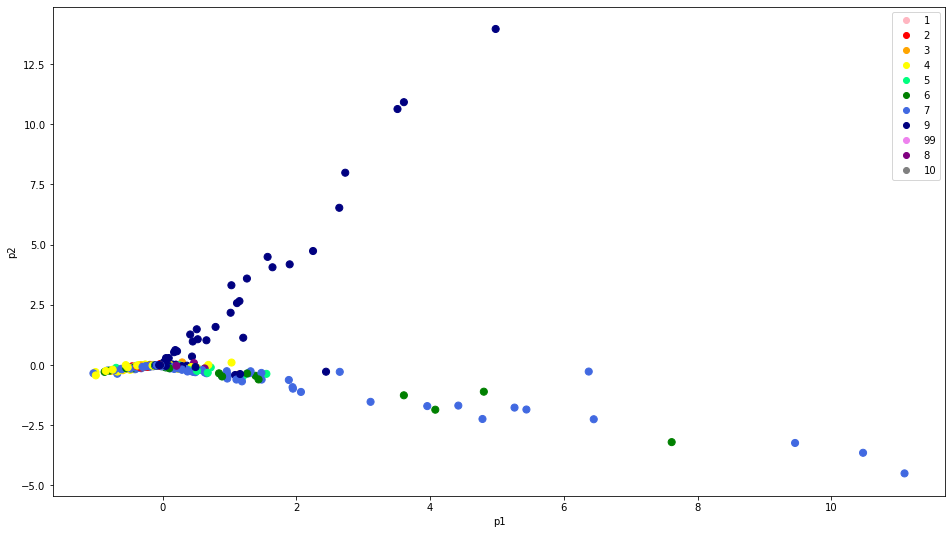

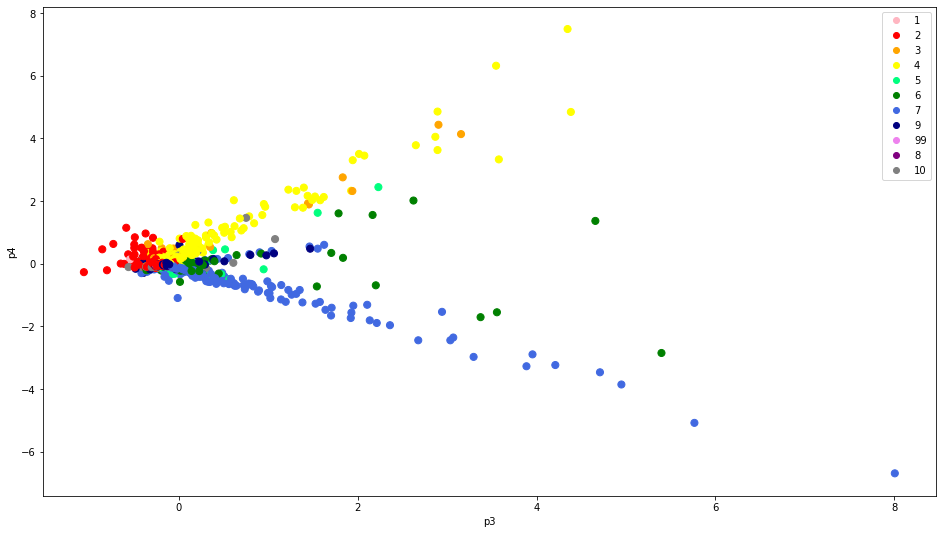

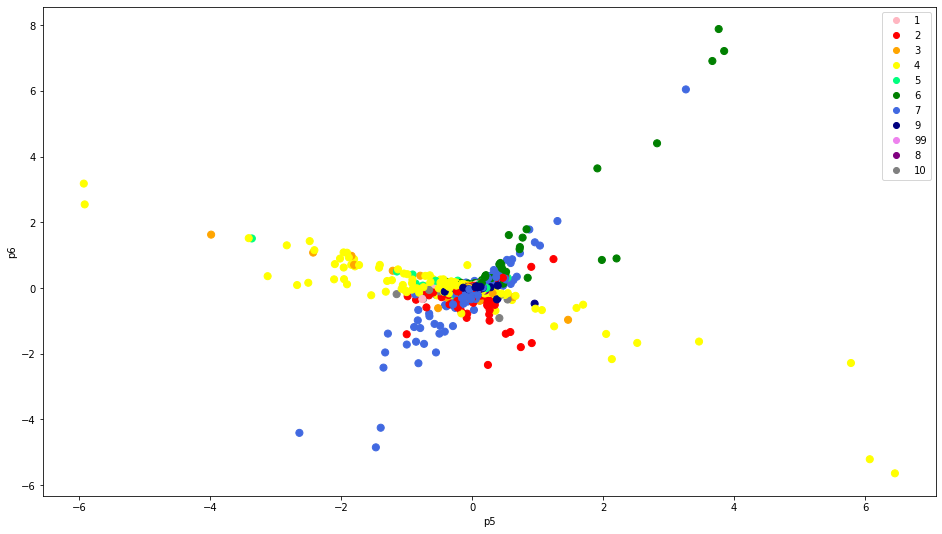

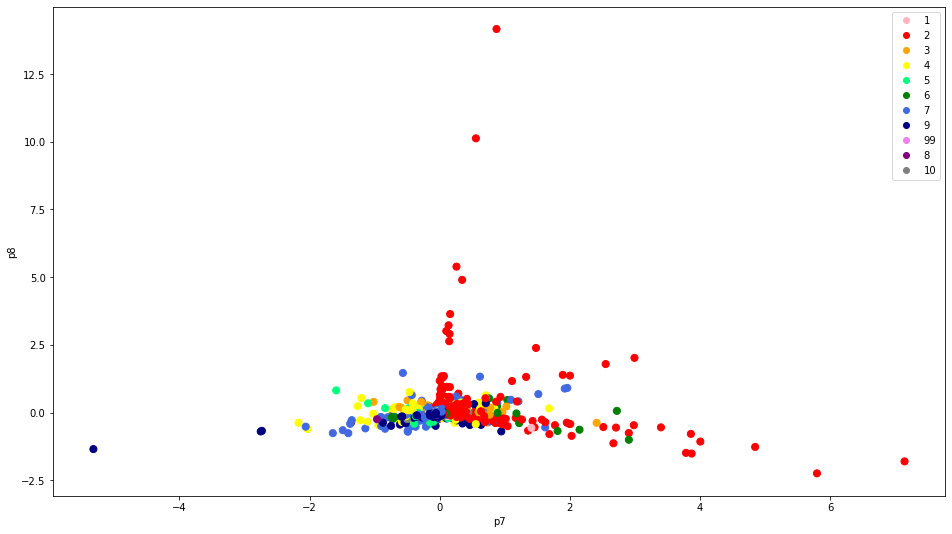

In [12]:
plt.rcParams["figure.figsize"] = (16, 9)
for i in range(0, 8, 2):
    plt.xlabel(f'p{i+1}')
    plt.ylabel(f'p{i+2}')    
    plt.scatter(features_reduce[:,i], features_reduce[:,i+1], s=50, c=color_map)
    markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
    plt.legend(markers, color_dict.keys(), numpoints=1)
    plt.show()

由散佈圖大致上可以看出，每個科系類別屬性的科系，比較靠近彼此，走勢較為相似。而且根據選擇不同的components，能看出差異的科系類別也有所不同。

### Q2.2

metric

In [13]:
features_mds = MDS(n_components=2, metric=True).fit_transform(features)
features_mds.shape

(1917, 2)

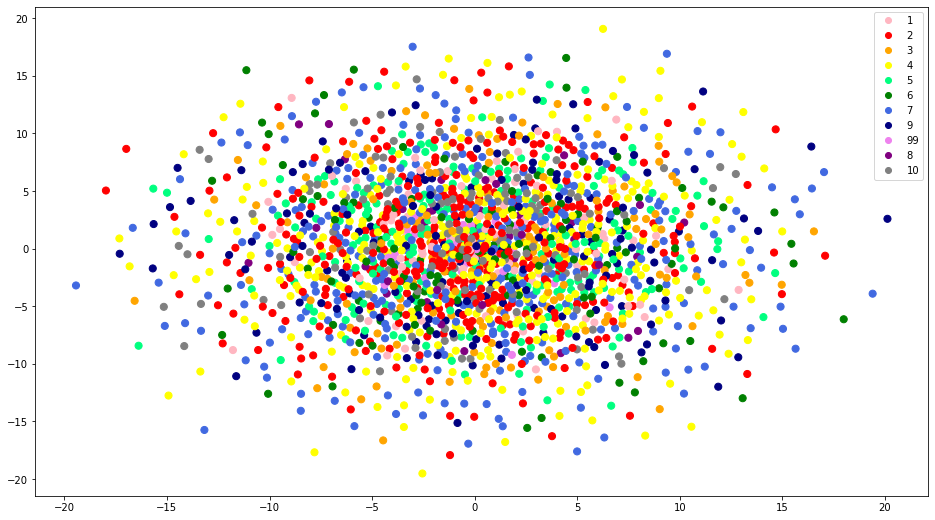

In [14]:
plt.scatter(features_mds[:,0], features_mds[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

non-metric

In [15]:
features_mds = MDS(n_components=2, metric=False).fit_transform(features)
features_mds.shape

(1917, 2)

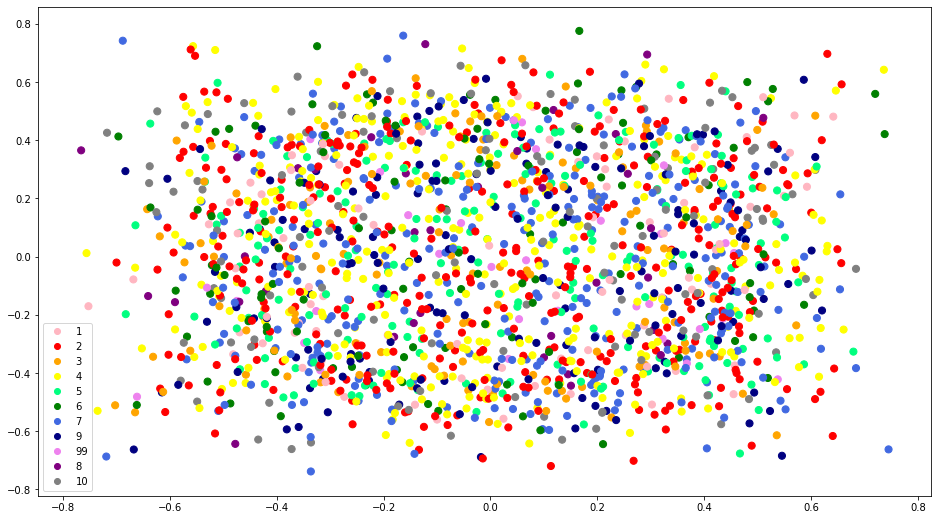

In [16]:
plt.scatter(features_mds[:,0], features_mds[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

### Q2.3

20 neighbors

In [ ]:
features_lle = LocallyLinearEmbedding(n_neighbors=20, n_components=2).fit_transform(features)
features_lle.shape

In [ ]:
plt.scatter(features_lle[:,0], features_lle[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

40 neighbors

In [ ]:
features_lle = LocallyLinearEmbedding(n_neighbors=40, n_components=2).fit_transform(features)
features_lle.shape

In [ ]:
plt.scatter(features_lle[:,0], features_lle[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

20 neighbors + pca

In [17]:
features_pca = PCA(n_components=100).fit_transform(features)
features_lle = LocallyLinearEmbedding(n_neighbors=20, n_components=2).fit_transform(features_pca)
features_lle.shape

(1917, 2)

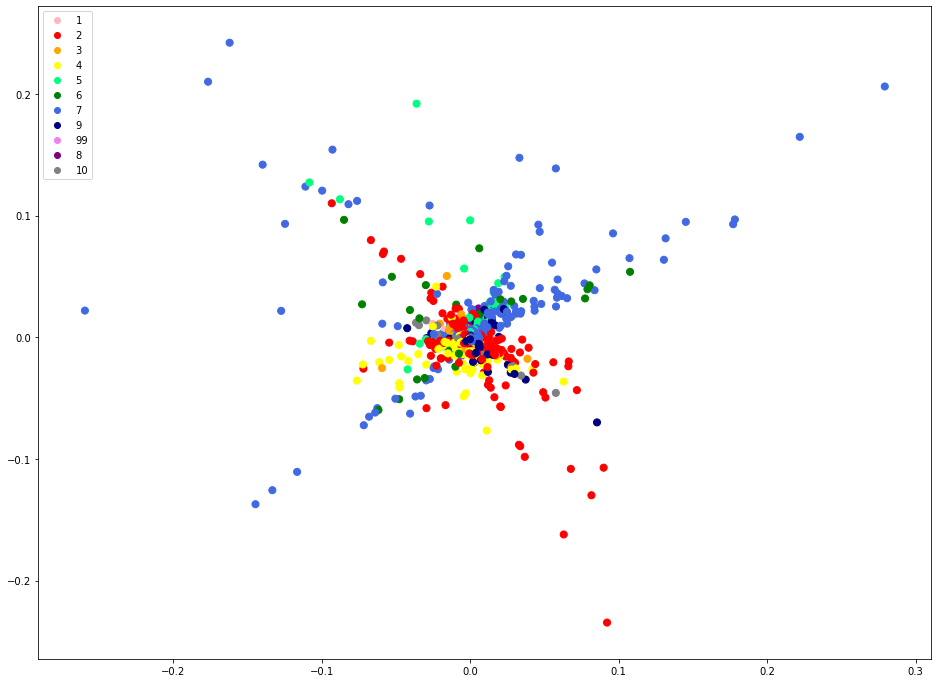

In [20]:
plt.scatter(features_lle[:,0], features_lle[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

### 2.4

RBF

In [18]:
features_kpca = KernelPCA(n_components=2, kernel='rbf').fit_transform(features)
features_kpca.shape

(1917, 2)

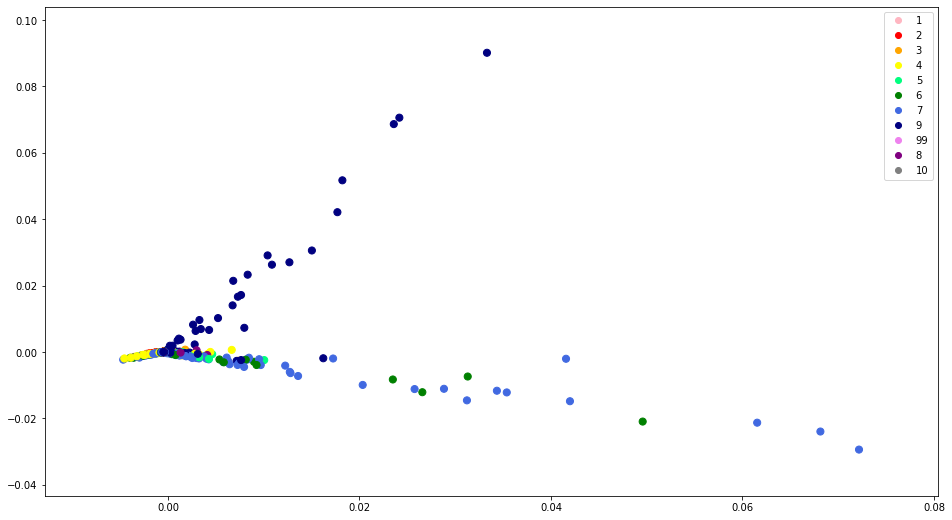

In [19]:
plt.scatter(features_kpca[:,0], features_kpca[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

Cosine

In [21]:
features_kpca = KernelPCA(n_components=2, kernel='cosine').fit_transform(features)
features_kpca.shape

(1917, 2)

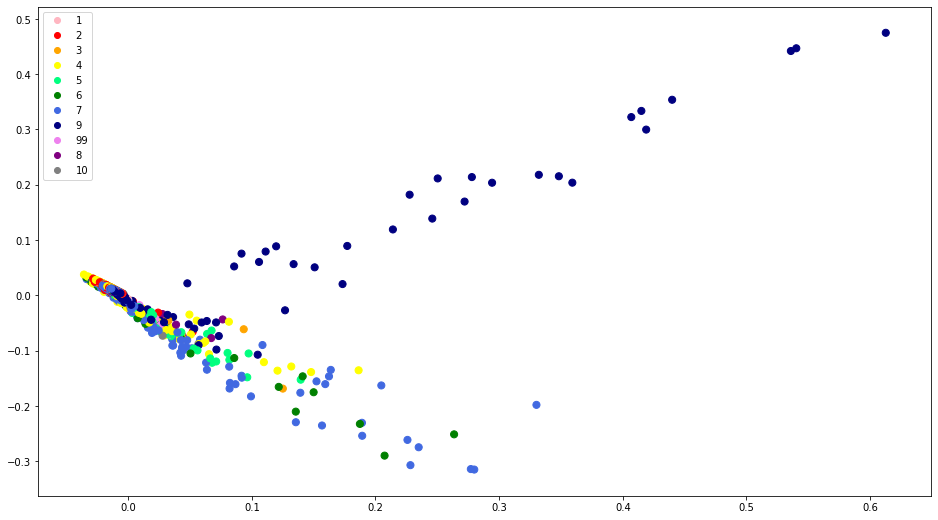

In [22]:
plt.scatter(features_kpca[:,0], features_kpca[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

### Q2.5

Euclidian

In [ ]:
features_tsne = TSNE(n_components=2, metric='euclidean', random_state=999).fit_transform(features)
features_tsne.shape

In [ ]:
plt.scatter(features_tsne[:,0], features_tsne[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

Cosine

In [ ]:
features_tsne = TSNE(n_components=2, metric='cosine', random_state=999).fit_transform(features)
features_tsne.shape

In [ ]:
plt.scatter(features_tsne[:,0], features_tsne[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

Jaccard

In [ ]:
features_tsne = TSNE(n_components=2, metric='jaccard', random_state=999).fit_transform(features)
features_tsne.shape

In [ ]:
plt.scatter(features_tsne[:,0], features_tsne[:,1], s=50, c=color_map)
markers = [plt.Line2D([0,0], [0,0], color=color, marker='o', linestyle='') for color in color_dict.values()]
plt.legend(markers, color_dict.keys(), numpoints=1)
plt.show()

In [ ]:
remove_list = ['workclass', 'occupation', 'native-country']
train_data = pd.read_csv('adult.data', skipinitialspace=True)
for c in remove_list:
    train_data = train_data[~train_data[c].isin(['?'])]
train_data.describe()

把 binary variable 轉成 one-hot

In [3]:
train_x = pd.DataFrame(pd.get_dummies(train_data.drop('label', axis=1)))
train_x.shape

(30162, 104)

檢查 one-hot feature，剔除樣本數不到10的 feature

In [4]:
for c in train_x.columns[6:]: # first 6 columns are continuous varibles
    if sum(train_x[c]) < 10:
        train_x = train_x.drop(c, axis=1)
features = train_x.columns # use of test data
train_x.shape

(30162, 102)

labels

In [5]:
label_dict = {'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1}
train_y = train_data['label'].map(label_dict)
train_y.shape

(30162,)

讀取 test data 並只保留 training data 有的 features

In [6]:
test_data = pd.read_csv('adult.test', skipinitialspace=True)
for c in remove_list:
    test_data = test_data[~test_data[c].isin(['?'])]
test_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,15060.000000,1.506000e+04,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,1.896164e+05,10.112749,1120.301594,89.041899,40.951594
std,13.380676,1.056150e+05,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.166550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.385888e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [7]:
test_x = pd.DataFrame(pd.get_dummies(test_data.drop('label', axis=1)))
test_x.shape

(15060, 103)

In [8]:
for c in test_x.columns[6:]: # first 6 columns are continuous varibles
    if c not in features:
        test_x = test_x.drop(c, axis=1)
test_x.shape

(15060, 102)

In [9]:
test_y = test_data['label'].map(label_dict)
test_y.shape

(15060,)

In [10]:
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()

## Q1.2

$$E(\omega) = \frac{1}{2}\omega^T\Lambda\omega - \sum_{i=1}^n\{t_nln(y_n) + (1-t_n)ln(1-y_n)\},\,y_n = \frac{1}{1+exp(-\omega^Tx_n)}$$\
$$\nabla E(\omega) = \frac{1}{2}(\Lambda^T + \Lambda)\omega + \sum_{i=1}^n (y_i - t_i)x_i = \Lambda\omega + x^T (y - t)$$\
$$H = \nabla\nabla E(\omega) = \Lambda + \sum_{i=1}^n y_i(1-y_i)x_i x_i^T = \Lambda + x R x^T$$
<center>where R is a NxN diagonal matrix with elements: $R_{nn} = y_n(1-y_n)$<\center>

## Q1.3

In [11]:
class mylogistic_l2():
    def __init__(self, reg_vec, max_iter = 1000, tol = 1e-5, add_intercept = True):
        self.reg_vec = reg_vec
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = add_intercept
       
    def fit(self, x, t):
        # add intercept
        if self.add_intercept:
            x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
    
        # init w
        b = self.reg_vec.trace() / self.reg_vec.shape[0]
        self.w = np.linalg.inv(x.T.dot(x) + b * np.identity(x.shape[1])).dot(x.T).dot(t)
        
        last_err = float("-inf")
        for _ in range(self.max_iter):
            # Newton-Raphson optimization method
            y = expit(self.w.T.dot(x.T))
            cur_err = self.err(y, t)
#             print(cur_err, (self.w**2).sum())
            if (cur_err - last_err) < self.tol:
                break
            last_err = cur_err
            
            gradient = self.reg_vec.dot(self.w) + x.T.dot(y-t)
            r = np.diagflat(y*(1-y))
            h = self.reg_vec + x.T.dot(r).dot(x)
            
            self.w = self.w - np.linalg.inv(h).dot(gradient)
            
            pred = np.where(y > 0.5, 1, 0)
#             print(f'acc: {sum(np.equal(pred, t)) / t.shape[0]}')
    
    def predict(self, x):
        if self.add_intercept:
            x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
        p = expit(self.w.T.dot(x.T))
        return np.where(p > 0.5, 1, 0)
    
    def err(self, y, t):
        y = np.clip(y, 1e-12, 1.-1e-12)
        return np.sum(self.w.T.dot(self.reg_vec).dot(self.w))/2 - np.sum(t*np.log(y) + (1-t)*np.log(1-y)) / y.shape[0]

### case 1: lambda = 1 for all coefficients

In [12]:
logic1 = mylogistic_l2(np.identity(train_x.shape[1]+1))

In [13]:
logic1.fit(train_x, train_y)

predict & show test accuracy and learned w

In [14]:
predict = logic1.predict(test_x)
acc = sum(np.equal(predict, test_y)) / test_y.shape[0]
print(f'test accuracy: {acc}')
print(f'w: {logic1.w}')

test accuracy: 0.8480743691899071
w: [ 2.48591297e-02  7.26281835e-07  1.85806163e-01  3.16590245e-04
  6.38679434e-04  2.90215841e-02  1.89694410e-01 -4.97719502e-01
 -3.10975203e-01 -1.29181492e-01 -7.94111558e-01 -6.18745004e-01
 -1.17270706e+00 -4.52249248e-01 -5.44907404e-01 -3.82721833e-01
 -9.99810311e-02 -2.62922226e-01 -6.29791390e-01 -4.96565840e-01
 -3.08326937e-01 -1.27584811e-01  1.28534378e-01  5.87953356e-01
 -2.50481307e-01  2.99991415e-01 -1.37579993e+00  6.82097030e-01
 -1.00989638e-01 -1.00975740e+00  1.19612260e+00  8.38966951e-01
 -9.56673074e-01 -1.50523219e+00 -1.08232392e+00 -8.14848370e-01
 -8.78492153e-02 -2.46913578e-02  7.15174653e-01 -1.06504054e+00
 -7.73348089e-01 -3.53722827e-01 -9.03671285e-01 -1.69395624e+00
  4.29670534e-01  4.99488476e-01  2.05962312e-01  5.68478621e-01
 -1.78947443e-01 -5.76254831e-01 -3.75781230e-01 -1.12608336e+00
 -1.50192093e+00 -5.01524893e-01  7.47819833e-01 -1.02439618e+00
 -2.92668734e-01 -6.35195702e-01 -8.96890178e-01 -4.8

### case 2: lambda = 1 for all but the intercept, no regularization for intercept term.

In [15]:
reg_vec = np.identity(train_x.shape[1]+1)
reg_vec[-1][-1] = 0
logic2 = mylogistic_l2(reg_vec)

In [16]:
logic2.fit(train_x, train_y)

predict & show test accuracy and learned w

In [17]:
predict = logic2.predict(test_x)
acc = sum(np.equal(predict, test_y)) / test_y.shape[0]
print(f'test accuracy: {acc}')
print(f'w: {logic2.w}')

test accuracy: 0.847808764940239
w: [ 2.54336822e-02  7.50706804e-07  2.95324923e-01  3.17024478e-04
  6.39652126e-04  2.94914512e-02  7.05717318e-01  1.78026500e-02
  2.09126595e-01  3.82731145e-01 -2.79821711e-01 -1.04552949e-01
 -9.31003048e-01  9.08118762e-02 -1.06210390e-01 -5.68864880e-02
  7.06129017e-01  5.36014978e-01  1.16361327e-01  1.37527872e-01
 -4.01951496e-01 -1.13370201e-01 -7.43801938e-02  6.79669927e-02
 -1.95742294e-02 -1.15929727e-02 -1.15969699e+00  2.67049827e-01
  2.18010721e-02 -5.26538178e-01  1.61452758e+00  1.36751001e+00
 -4.92456781e-01 -1.01532722e+00 -6.05766415e-01 -3.41949002e-01
  1.64109182e-01  2.28422252e-01  9.64856017e-01 -8.17967488e-01
 -5.20782272e-01 -9.91243550e-02 -6.49283758e-01 -1.55300394e+00
  6.78427764e-01  7.51030497e-01  4.55411798e-01  8.18714335e-01
  7.31938653e-02 -4.21151206e-02  1.99456866e-01 -5.83542666e-01
 -9.36996740e-01  7.53014758e-02  1.28789619e+00 -3.72048376e-01
  3.94360616e-01  4.30693947e-02 -2.61235808e-01  1.95

### case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term.

In [18]:
reg_vec = np.diagflat(np.array([1]*6 + [0.5]*(train_x.shape[1]-6) + [0]))
logic3 = mylogistic_l2(reg_vec)

In [19]:
logic3.fit(train_x, train_y)

predict & show test accuracy and learned w

In [20]:
predict = logic3.predict(test_x)
acc = sum(np.equal(predict, test_y)) / test_y.shape[0]
print(f'test accuracy: {acc}')
print(f'w: {logic3.w}')

test accuracy: 0.847675962815405
w: [ 2.54757306e-02  7.51944312e-07  3.19092342e-01  3.17319913e-04
  6.40115460e-04  2.95135991e-02  7.66990116e-01  7.62915465e-02
  2.68338059e-01  4.43128005e-01 -2.20821080e-01 -4.63422172e-02
 -1.28758443e+00  2.18992475e-01 -2.26138731e-03  2.18816236e-02
  9.74981437e-01  7.54034100e-01  2.92224730e-01  2.93070078e-01
 -4.19612080e-01 -1.04346489e-01 -1.12963414e-01 -3.78240642e-02
  3.76517836e-02 -7.30516163e-02 -2.08394383e+00  1.86338344e-01
  5.48283061e-02 -5.72016463e-01  1.82571096e+00  1.39641689e+00
 -5.47067026e-01 -1.05936562e+00 -6.55642151e-01 -3.88036591e-01
  2.36234456e-01  3.00253533e-01  1.03825745e+00 -7.52669809e-01
 -4.53424415e-01 -2.69071693e-02 -5.82347571e-01 -2.00233647e+00
  7.51037233e-01  8.27361969e-01  5.28330008e-01  8.95057963e-01
  1.45241841e-01 -8.34438407e-02  2.32699144e-01 -5.92702337e-01
 -9.22764551e-01  1.11240624e-01  1.25497096e+00 -3.83664192e-01
  4.13058381e-01  4.13741738e-02 -2.63868161e-01  1.93

## Q1.4

split the training data into subtraining and tuning

In [21]:
m = train_x.shape[0]*9//10
subtrain_x, subtrain_y = train_x[:m], train_y[:m]
tune_x, tune_y = train_x[m:], train_y[m:]
print(subtrain_x.shape, subtrain_y.shape, tune_x.shape, tune_y.shape)

(27145, 102) (27145,) (3017, 102) (3017,)


決定 regularization coefficient list

In [22]:
reg_coef_list = [0.01, 0.02, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

step 1: constraint that $a_1 = a_2$

In [23]:
tune_acc = []
for a in reg_coef_list:
    reg_vec = np.diagflat(np.array([a]*6 + [a]*(train_x.shape[1]-6) + [0]))
    logic = mylogistic_l2(reg_vec)
    logic.fit(subtrain_x, subtrain_y)
    predict = logic.predict(tune_x)
    acc = sum(np.equal(predict, tune_y)) / tune_y.shape[0]
    tune_acc.append(acc)
    print(f'a1: {a}, a2: {a}, test accuracy: {acc}')

a1: 0.01, a2: 0.01, test accuracy: 0.8336095459065297
a1: 0.02, a2: 0.02, test accuracy: 0.8336095459065297
a1: 0.05, a2: 0.05, test accuracy: 0.8336095459065297
a1: 0.1, a2: 0.1, test accuracy: 0.843221743453762
a1: 0.5, a2: 0.5, test accuracy: 0.8428902883659264
a1: 1, a2: 1, test accuracy: 0.8428902883659264
a1: 5, a2: 5, test accuracy: 0.8435531985415976
a1: 10, a2: 10, test accuracy: 0.8422273781902552
a1: 50, a2: 50, test accuracy: 0.8405701027510772
a1: 100, a2: 100, test accuracy: 0.839907192575406


step 2: fix $a_1 = a_1^*$ and search $a_2$. In this case, $a_1 = 5$.

In [24]:
tune_acc = []
for a in reg_coef_list:
    reg_vec = np.diagflat(np.array([5]*6 + [a]*(train_x.shape[1]-6) + [0]))
    logic = mylogistic_l2(reg_vec)
    logic.fit(subtrain_x, subtrain_y)
    predict = logic.predict(tune_x)
    acc = sum(np.equal(predict, tune_y)) / tune_y.shape[0]
    tune_acc.append(acc)
    print(f'a1: {5}, a2: {a}, test accuracy: {acc}')

a1: 5, a2: 0.01, test accuracy: 0.8336095459065297
a1: 5, a2: 0.02, test accuracy: 0.8336095459065297
a1: 5, a2: 0.05, test accuracy: 0.8336095459065297
a1: 5, a2: 0.1, test accuracy: 0.843221743453762
a1: 5, a2: 0.5, test accuracy: 0.8428902883659264
a1: 5, a2: 1, test accuracy: 0.843221743453762
a1: 5, a2: 5, test accuracy: 0.8435531985415976
a1: 5, a2: 10, test accuracy: 0.8422273781902552
a1: 5, a2: 50, test accuracy: 0.8405701027510772
a1: 5, a2: 100, test accuracy: 0.839907192575406


step 3: fix $a_2 = a_2^*$ and search $a_1$. In this case, $a_2 = 5$.

In [25]:
tune_acc = []
for a in reg_coef_list:
    reg_vec = np.diagflat(np.array([a]*6 + [5]*(train_x.shape[1]-6) + [0]))
    logic = mylogistic_l2(reg_vec)
    logic.fit(subtrain_x, subtrain_y)
    predict = logic.predict(tune_x)
    acc = sum(np.equal(predict, tune_y)) / tune_y.shape[0]
    tune_acc.append(acc)
    print(f'a1: {a}, a2: {5}, test accuracy: {acc}')

a1: 0.01, a2: 5, test accuracy: 0.8435531985415976
a1: 0.02, a2: 5, test accuracy: 0.8435531985415976
a1: 0.05, a2: 5, test accuracy: 0.8435531985415976
a1: 0.1, a2: 5, test accuracy: 0.8435531985415976
a1: 0.5, a2: 5, test accuracy: 0.8435531985415976
a1: 1, a2: 5, test accuracy: 0.8435531985415976
a1: 5, a2: 5, test accuracy: 0.8435531985415976
a1: 10, a2: 5, test accuracy: 0.8435531985415976
a1: 50, a2: 5, test accuracy: 0.8438846536294332
a1: 100, a2: 5, test accuracy: 0.8438846536294332


best hyper-parameters: $a_1 = 50, a_2 = 5$

step 4: using $a_1 = 50, a_2 = 5$, train the model on training data, and test on test date

In [26]:
reg_vec = np.diagflat(np.array([50]*6 + [5]*(train_x.shape[1]-6) + [0]))
logic = mylogistic_l2(reg_vec)
logic.fit(train_x, train_y)
predict = logic.predict(test_x)
acc = sum(np.equal(predict, test_y)) / test_y.shape[0]
print(f'a1: {50}, a2: {5}, test accuracy: {acc}')

a1: 50, a2: 5, test accuracy: 0.84867197875166


## Q1.5

In [27]:
from sklearn.linear_model import LogisticRegression

use l2 penalty

In [28]:
clf = LogisticRegression(penalty='l2', max_iter=100)
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.7926958831341302

In [29]:
clf.coef_

array([[ 3.81505185e-03, -3.42208798e-06, -2.86806326e-03,
         3.35205365e-04,  7.75880389e-04, -1.82173095e-02,
         4.44679003e-04,  1.39450311e-04, -6.02054102e-03,
         1.06410731e-03, -9.03960774e-05, -8.32870342e-05,
        -1.81146245e-05, -7.09499374e-04, -1.05052206e-03,
        -3.31609835e-04, -1.24935055e-04, -2.53074773e-04,
        -4.94286869e-04, -3.98127428e-04, -9.97419152e-05,
        -1.28378639e-04,  2.77673537e-03,  6.82903042e-04,
        -4.66133113e-03,  1.75482039e-03, -5.15499544e-05,
         8.29697652e-04, -2.30520154e-03, -3.16187437e-03,
         2.18334899e-05,  1.04700801e-02, -3.02514562e-04,
        -1.01326399e-02, -8.04850197e-04, -6.54136753e-04,
        -2.33561255e-03, -8.27663298e-04,  3.20522013e-03,
        -7.31337759e-04, -1.23209314e-03, -1.21118305e-03,
        -3.31924411e-03, -1.63144328e-04,  2.46347911e-03,
         1.98375013e-04, -2.67510057e-04,  1.11803225e-04,
        -4.49302820e-04,  9.39796122e-03, -6.01084114e-0

use newton-cg solver without penalty

In [30]:
clf = LogisticRegression(solver='newton-cg', penalty='none', max_iter=100)
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

/home/white123/miniconda3/envs/sl/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/white123/miniconda3/envs/sl/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/white123/miniconda3/envs/sl/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.84800796812749

In [31]:
clf.coef_

array([[ 2.47065554e-02,  7.34148985e-07,  1.62619328e-01,
         3.16595827e-04,  6.37016209e-04,  2.91658465e-02,
         1.08429642e-01, -5.88940930e-01, -3.99253426e-01,
        -2.15826650e-01, -8.89052154e-01, -7.12318705e-01,
        -3.47660518e-01, -6.03779261e-01, -6.82602162e-01,
        -4.32500457e-01, -2.27046955e-01, -4.20675412e-01,
        -7.97224501e-01, -6.28216289e-01, -3.01625710e-01,
        -1.46350517e-01,  1.63240437e-01,  6.93479250e-01,
        -3.14462237e-01,  3.55903914e-01, -3.41096963e-01,
         7.77288976e-01, -1.38954853e-01, -8.04515514e-01,
         5.15616154e-01,  7.05637452e-01, -6.68669811e-01,
        -1.32375347e+00, -8.67855788e-01, -6.01081765e-01,
        -1.88273262e-01, -1.25735296e-01,  6.14336599e-01,
        -1.17981430e+00, -8.98437831e-01, -4.67590648e-01,
        -1.01065898e+00, -6.85523186e-01,  3.25306062e-01,
         4.00761869e-01,  1.03015352e-01,  4.64524132e-01,
        -2.86411220e-01, -3.47757651e-01, -4.77471282e-0

use newton-cg solver with l2 penalty

In [32]:
clf = LogisticRegression(solver='newton-cg', penalty='l2', max_iter=100)
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

/home/white123/miniconda3/envs/sl/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.848339973439575

In [33]:
clf.coef_

array([[ 2.43657625e-02,  7.20183272e-07,  1.60023435e-01,
         3.16116321e-04,  6.35570289e-04,  2.88959454e-02,
         9.86956246e-02, -5.90820587e-01, -4.10594945e-01,
        -2.24584981e-01, -8.92813698e-01, -7.15945527e-01,
        -1.60465091e-01, -6.10246854e-01, -6.86085506e-01,
        -4.31352771e-01, -2.11157150e-01, -4.04312797e-01,
        -8.21057486e-01, -6.30510743e-01, -2.94716918e-01,
        -1.46271252e-01,  1.67091701e-01,  6.92588756e-01,
        -3.21562750e-01,  3.59841075e-01, -1.82717670e-01,
         7.67706395e-01, -1.43765237e-01, -7.19946582e-01,
         2.58231986e-01,  6.34303234e-01, -5.53309742e-01,
        -1.23582845e+00, -7.70972788e-01, -5.09006863e-01,
        -2.08694982e-01, -1.48175826e-01,  5.91397339e-01,
        -1.17724037e+00, -9.00896572e-01, -4.85917464e-01,
        -1.02643418e+00, -3.81112460e-01,  3.06492019e-01,
         3.72676668e-01,  8.11478509e-02,  4.41098904e-01,
        -3.06197850e-01, -2.33538140e-01, -5.20618274e-0

### best test acc of my own model: 0.84867197875166
### best test acc of sklearn model: 0.848339973439575

接著比較 w 參數

my own model:

In [34]:
print(f'sum of w^2 = {(logic.w**2).sum()}')

sum of w^2 = 85.22593630608262


sklearn model:

In [35]:
print(f'sum of w^2 = {(clf.coef_**2).sum()}')

sum of w^2 = 27.254167924206236


結論：在 best test accuracy 上，兩者的結果差異不大，但 sklearn model 的 solver 和 penalty 選擇會蠻大程度影響到結果的，而 IRLS 在結果上相對穩定，幾乎都有達到 83% 以上。可能的原因是 IRLS 直接用 closed-form solution 求解，再用牛頓法更新參數，相對較為穩定，但運行的速度也較慢。而 w 的 square sum 則是 sklearn model 較小，自己的 model 較大。